# Text Mining Project

# Data Wrangling

In [2]:
# read neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Inspecting dataset

In [3]:
df = pd.read_csv("Friends.csv")
display(df)

,Text,Speaker,Episode,Season,Show
0,Originally written by Marta Kauffman and David...,NaN,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
1,Transcribed by guineapig.,NaN,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
2,CENTRAL PERK. (ALL PRESENT EXCEPT RACHEL AND ...,SCENE 1,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
3,There's nothing to tell! He's just some guy I...,MONICA,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
4,"C'mon, you're going out with the guy! There's...",JOEY,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
...,...,...,...,...,...
69969,Then I'm happy too. (They're still hugging - ...,Ross,Episode-15-The One Where Estelle Dies,Season-10,Friends
69970,COMMERCIAL BREAK,NaN,Episode-15-The One Where Estelle Dies,Season-10,Friends
69971,Estelle's memorial service. Joey is giving a ...,[Scene,Episode-15-The One Where Estelle Dies,Season-10,Friends
69972,Thank you all for coming. We're here today to...,Joey,Episode-15-The One Where Estelle Dies,Season-10,Friends


In [4]:
unique_speakers = df['Speaker'].unique()
num_unique_speakers = len(unique_speakers)
print("All speakers included are: ", unique_speakers)
print("Number of speakers considered: ", num_unique_speakers)

All speakers included are:  [nan 'SCENE 1' 'MONICA' ... 'Lady' 'r Zelner' 'Answering machine']
Number of speakers considered:  1144


In [5]:
# Total number of Nans per column
df.isna().sum()

Text          0
Speaker    6284
Episode       0
Season        0
Show          0
dtype: int64

In [6]:
# All rows in dataframe of which the Speaker column has a NaN value
df[df.isna().any(axis=1)]

,Text,Speaker,Episode,Season,Show
0,Originally written by Marta Kauffman and David...,NaN,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
1,Transcribed by guineapig.,NaN,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
7,"(THE OTHERS STARE, BEMUSED)",NaN,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
11,(CUT TO SAME SET),NaN,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
20,(CUT TO SAME SET. ROSS HAS NOW ENTERED),NaN,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
...,...,...,...,...,...
69759,OPENING CREDITS,NaN,Episode-15-The One Where Estelle Dies,Season-10,Friends
69817,"(Phoebe is outside, taking her cell phone out ...",NaN,Episode-15-The One Where Estelle Dies,Season-10,Friends
69856,(Chandler and Monica are speechless).,NaN,Episode-15-The One Where Estelle Dies,Season-10,Friends
69970,COMMERCIAL BREAK,NaN,Episode-15-The One Where Estelle Dies,Season-10,Friends


## Structuring

In [7]:
# Keep only relevant columns
columns_of_interest = ['Text', 'Speaker']
relevant_df = df[columns_of_interest]
display(relevant_df)

,Text,Speaker
0,Originally written by Marta Kauffman and David...,NaN
1,Transcribed by guineapig.,NaN
2,CENTRAL PERK. (ALL PRESENT EXCEPT RACHEL AND ...,SCENE 1
3,There's nothing to tell! He's just some guy I...,MONICA
4,"C'mon, you're going out with the guy! There's...",JOEY
...,...,...
69969,Then I'm happy too. (They're still hugging - ...,Ross
69970,COMMERCIAL BREAK,NaN
69971,Estelle's memorial service. Joey is giving a ...,[Scene
69972,Thank you all for coming. We're here today to...,Joey


## Cleaning and Enriching

<AxesSubplot:>

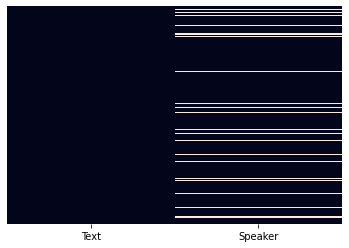

In [8]:
# Display null values in heatmap
sns.heatmap(relevant_df.isnull(),yticklabels=False, cbar=False)

In [9]:
# Drop rows with Nan Values 
relevant_df.dropna(inplace=True)
relevant_df.reset_index(inplace=True)
relevant_df.drop('index', axis=1, inplace=True)
display(relevant_df)

C:\Users\rensk\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\rensk\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Text,Speaker
0,CENTRAL PERK. (ALL PRESENT EXCEPT RACHEL AND ...,SCENE 1
1,There's nothing to tell! He's just some guy I...,MONICA
2,"C'mon, you're going out with the guy! There's...",JOEY
3,So does he have a hump? A hump and a hairpiece?,CHANDLER
4,"Wait, does he eat chalk?",PHOEBE
...,...,...
63685,"Yeah, yeah, oh! (They hug)",Ross
63686,"Oh! Oh, I'm so happy.",Rachel
63687,Then I'm happy too. (They're still hugging - ...,Ross
63688,Estelle's memorial service. Joey is giving a ...,[Scene


In [10]:
# Visualizing all speakers
unique_speakers = relevant_df['Speaker'].unique()
for speaker in unique_speakers:
    print(speaker)

SCENE 1
MONICA
JOEY
CHANDLER
PHOEBE
ALL
ROSS
RACHEL
WAITRESS
SCENE 2
PHOEBE+ROSS+CHANDLER+JOEY
PAUL
SCENE 3
TV
SCENE 4
SCENE 5
FRANNIE
CREDITS SCENE
PRE-INTRO SCENE
MARSHA
CAROL
CHANDLER+JOEY
MRS. GELLER
MR. GELLER
SUSAN
BARRY
ROBBIE
BERNICE (OVER INTERCOM)
BARRY (TO INTERCOM)
DR. OBERMAN
PAULA
ALAN (INTERCOM)
ALAN
THE GUYS
LIZZIE
SCENE 6
PRE-INTRO-SCENE
BOYS
LESLIE
KIKI
JOANNE
RECEPTIONIST
PIZZA GUY (OUTSIDE)
PIZZA GUY
MONICA+PHOEBE
BOTH
KID
[Scene
MNCA
RACH
CHAN
PHOE
ANGL
JNCE
WOMAN
BOB
[She leaves.] CHAN
(LIGHTS GO UP ON THE STAGE
AURORA
DIRECTOR
SCENE 7
JILL
MNCA/JOEY/PHOE
HECK
PAOLO
[Pre- intro scene
Shelley
Chandler
[Scene 1
Rachel
Monica
Phoebe
Joey
Ross
All
[Scene 2
Aunt Lillian
Mrs. Geller
Mr. Geller
Nurse
[Scene 3
[Scene 4
[Scene 5
[Scene 6
[Scene 7
[Scene 8
[Scene 9
Andrea
[Scene 10
[End credits. Scene
Lowell
Written by
Transcribed by
With Minor Adjustments by
Terry
Guy
Susan
Girl
(Joey turns around and sees his face on a poster in the subway. The poster says
Carol
[Pre-intr

In [11]:
# Turn all values in Speaker column to lowercase
relevant_df['Speaker'] = relevant_df['Speaker'].str.lower()

C:\Users\rensk\AppData\Local\Temp/ipykernel_15292/4193878769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df['Speaker'] = relevant_df['Speaker'].str.lower()


In [12]:
# Manually checked all relevant speakers in dataframe
relevant_speakers = ['monica', 'mnca', 'joey', 'chandler', 'chan', 'phoebe', 'phoe', 'ross', 'rachel', 'rach', 'all', 'phoebe+ross+chandler+joey', 'chandler+joey', 'monica+phoebe', 'mnca/joey/phoe', 'monica and phoebe', 'joey, chandler, and ross', 'joey and chandler', 'rachel and phoebe', 'rachel/phoebe', 'chandler and joey', 'monica & rachel', 'chandler & joey', 'rachel and monica', 'chandler, ross', 'phoebe, rachel', 'ross and rachel', 'joey+ross', 'phoebe and rachel', 'ross, rachel & phoebe', 'joey, chandler & ross', 'phoebe, joey & ross', 'mnca/phoe', 'phoe/mnca', 'ross/julie', 'rahcel', 'joey/chan', 'chan, joey, ross', 'chandler, monica, and joey', 'ross, chandler & joey', 'monica and rachel', 'monica and ross', 'rachel, monica, roy, and chip', 'chandler, joey, and phoebe', 'ross and chandler', 'phoebe and ryan', 'joey and ross', 'young ross', 'young monica', 'phoebe and girl', 'chandler and phoebe', 'rachel, chandler, and joey', 'monica and joey', 'joey and monica', 'monica, ross, and joey', 'phoebe and monica', 'phoebe and leslie', 'chandler, phoebe, and joey', 'ross and joey', 'chandler, phoebe, and rachel', 'phoebe sr', 'ross and bonnie', 'phoebe sr.', 'rachel and bonnie', 'phoebe, ross, and rachel', 'chandler, monica, joey, and rachel', 'monica, chandler, phoebe, and rachel', 'joey, rachel, and ross', 'chandler and ross', 'monica, rachel, and joey', 'chandler, monica and rachel', 'phobe', 'monica, joey, and phoebe', 'ross and monica', 'chandler and monica', 'joey and rachel', 'dream monica', 'dream joey', 'chandler and rachel', 'phoebe and joey', 'phoebe and gary', 'joey’s head', 'phoebe and ross', 'joey, rachel, and phoebe', 'rachel and joey', 'monica and chandler', 'ross and will', 'joey and phoebe', 'phoebe & joey', 'ross & rachel', 'monica & chandler', 'joey/wigglemunch', 'joey nods', 'rachel to emma', 'ross and rachel while looking at each other surprised and shocked', 'ross with a look of wondering how long this is going to go on on his face', "ross starts talking over her 'do you remember' line", 'rachel opens their door', 'joey laughs', 'joey looks rejected', 'ross to monica', 'monica to ross', 'monica to emma', 'monica to amy', 'phoebe shakes her hand and says', 'phoebe looks down', "ross first has a look of 'huh' then changes it to sarcastic happy", 'ross starts playing with a plate', 'monica about to have a heart attack', 'joey raises his hand', 'ross looks down', 'phoebe while cutting a sweet potatoe in the air', 'joey groans and gets off the phone', 'joey all nervous and looking down and fiddling with his ear', 'rachel turns to ross', 'ross walks over', 'monica screaming at ross', "rachel starts messing up amy's hair", 'amy and rachel at same time', 'monica starts crying', 'ross, rachel', 'rachel, phoebe', 'ross, mike', 'phoebe, mike', 'joey/drake', 'phoebe/waitress', 'ross, joey and chandler', 'joey (checks the refrigerator)', 'chandler (reading the newspaper)', 'joey (gives a thumbs up sign)', 'rachel (feeling awkward)', 'rachel (awkward chuckle)', 'phoebe (to joey)', 'chandler (laughs)', 'monica (laughs)', 'monica (on phone)', 'rachel (to steve)', 'monica (to joey)', 'joey & monica', 'monica, chandler, ross', 'chandler (stands up and walks to joey)', 'monica, rachel, chandler', 'chandler/joey/rachel/monica', 'racel', 'rachel, chandler and monica', 'everyone but monica', 'everybody', 'rachel/actress', 'chandlers', 'rache', 'ross and charlie', 'phoebe & mike', 'monica, chandler and phoebe', "joey's voice, but she sees ross", "joey's voice/ross", 'rachel/ross', 'joey (to rachel)', 'monica (reads a form in her lap)', 'chandler (to monica)', 'ross (on the verge of tears)', 'ross, rachel and chandler', 'chandler (nearly weeping)', 'ross (stops recording)', 'phoebe (sees the cake)', 'joey (staring at the cake)', 'rachel (on the phone)', 'joey (to chandler)', 'chandler (to rachel)', 'ross (to emma)', 'phoebe (to mike)', 'phoebe (walking to ross carrying a black leather jacket)', 'monica (puzzled)', 'rachel (leaving)', 'all (except rachel)', 'phoebe (doing estelle)', 'phoebe-estelle']
speakers_check = []

# Check for duplicates
for item in relevant_speakers:
    if item not in speakers_check:
        speakers_check.append(item)

print("Distinct number of (raw) speakers: ", len(relevant_speakers))
print("Distinct number of speakers: ", len(speakers_check))

Distinct number of (raw) speakers:  176
Distinct number of speakers:  176


In [13]:
# In this cell speakers will be inserted individually into the dataframe when a 'speaker' contains multiple speakers.
# Moreover, correct misspellings and alternative names

# List containing all indices that needs to be removed due to:
# 1. Not being in the list of relevant speakers
# 2. Being splitted due to string containing multiple speakers, thus original string removed and individual speakes added
index_to_be_removed = []
number_of_rows = len(relevant_df.index)

# all correctly spelled names that are relevant
all_relevant_characters = ['monica', 'rachel', 'phoebe', 'joey', 'chandler', 'ross']

# Some troublesome text that would have to be manually converted (at our skill-level)
troublesome_text = ['ross and rachel while looking at each other surprised and shocked', 'phoebe shakes her hand and says','joey raises his hand', 'joey groans and gets off the phone', 'joey all nervous and looking down and fiddling with his ear', 'amy and rachel at same time']

# List containing all text that required specific processing outside of provided operations
further_processing = []

# Split sentences containing multiple characters, and add for each character the corresponing sentence individually.
for index in range(number_of_rows):
    if relevant_df['Speaker'][index] not in relevant_speakers:
        index_to_be_removed.append(index)
    else:
        speakers_splitted = []
        # Some troublesome text, manually converted
        if relevant_df['Speaker'][index] in troublesome_text:
            if relevant_df['Speaker'][index]==troublesome_text[0]:
                speakers_splitted.append('ross')
                speakers_splitted.append('rachel')
            elif relevant_df['Speaker'][index]==troublesome_text[1]:
                speakers_splitted.append('phoebe')
            elif relevant_df['Speaker'][index]==troublesome_text[2] or relevant_df['Speaker'][index]==troublesome_text[3] or relevant_df['Speaker'][index]==troublesome_text[4]:
                speakers_splitted.append('joey')
            elif relevant_df['Speaker'][index]==troublesome_text[5]:
                speakers_splitted.append('rachel')
                
        # Misspellings or alternative names
        elif relevant_df['Speaker'][index]=='mnca' or relevant_df['Speaker'][index]=='young monica' or relevant_df['Speaker'][index]=='dream monica':
            relevant_df.loc[index] = [relevant_df['Text'][index], 'monica']
        elif relevant_df['Speaker'][index]=='chandler' or relevant_df['Speaker'][index]=='chan' or relevant_df['Speaker'][index]=='chandlers':
            relevant_df.loc[index] = [relevant_df['Text'][index], 'chandler']
        elif relevant_df['Speaker'][index]=='phoe' or relevant_df['Speaker'][index]=='phoebe sr' or relevant_df['Speaker'][index]=='phoebe sr.' or relevant_df['Speaker'][index]=='phobe' or relevant_df['Speaker'][index]=='phoebe-estelle' or relevant_df['Speaker'][index]=='phoebe (doing estelle)':
            relevant_df.loc[index] = [relevant_df['Text'][index], 'phoebe']
        elif relevant_df['Speaker'][index]=='rach' or relevant_df['Speaker'][index]=='rahcel' or relevant_df['Speaker'][index]=='rache' or relevant_df['Speaker'][index]=='racel':
            relevant_df.loc[index] = [relevant_df['Text'][index], 'rachel']
        elif relevant_df['Speaker'][index]=='young ross':
            relevant_df.loc[index] = [relevant_df['Text'][index], 'ross']
        elif relevant_df['Speaker'][index]=='dream joey' or "joey’s" in relevant_df['Speaker'][index] or "joey's" in relevant_df['Speaker'][index]:
            relevant_df.loc[index] = [relevant_df['Text'][index], 'joey']
            
        # Other cases
        elif relevant_df['Speaker'][index]=='all':
            for character in all_relevant_characters:
                speakers_splitted.append(character)
        elif '(' in relevant_df['Speaker'][index] or ')' in relevant_df['Speaker'][index]:
            split_on_space = relevant_df['Speaker'][index].split(" ")
            
            # All (except rachel)-scenario
            if split_on_space[0]=='all':
                for character in all_relevant_characters:
                    if character=='rachel':
                        pass
                    else:
                        speakers_splitted.append(character)
            else:
                # First entity in text
                speakers_splitted.append(split_on_space[0])
                
        elif '&' in relevant_df['Speaker'][index] and ',' in relevant_df['Speaker'][index]:
            split_on_comma = relevant_df['Speaker'][index].split(",")
            split_on_and = split_on_comma[-1].split("&")
            for person in split_on_and:
                speakers_splitted.append(person)
            for person in split_on_comma[0:-1]:
                speakers_splitted.append(person)
        elif 'and' in relevant_df['Speaker'][index] and ',' in relevant_df['Speaker'][index]:
            split_on_comma = relevant_df['Speaker'][index].split(",")
            split_on_and = split_on_comma[-1].split(" and")
            for person in split_on_and:
                speakers_splitted.append(person)
            for person in split_on_comma[0:-1]:
                speakers_splitted.append(person)
        elif '+' in relevant_df['Speaker'][index]:
            speakers_splitted = relevant_df['Speaker'][index].split("+")
        elif '/' in relevant_df['Speaker'][index]:
            speakers_splitted = relevant_df['Speaker'][index].split("/")
        elif '&' in relevant_df['Speaker'][index]:
            speakers_splitted = relevant_df['Speaker'][index].split("&")
        elif ',' in relevant_df['Speaker'][index]:
            speakers_splitted = relevant_df['Speaker'][index].split(",")
        elif 'and' in relevant_df['Speaker'][index]:
            speakers_splitted = relevant_df['Speaker'][index].split(" and")
        else:
            if relevant_df['Speaker'][index] not in all_relevant_characters:
                further_processing.append((index, relevant_df['Text'][index], relevant_df['Speaker'][index]))
        
        if len(speakers_splitted)> 0:
            # Remove empty strings (other alternatives failed)
            speakers_splitted = ' '.join(speakers_splitted).split()
            
            # In case 'chan' is mentioned in a concatenation of speakers
            if 'chan' in speakers_splitted:
                speakers_splitted.remove('chan')
                speakers_splitted.append('chandler')
            
            # Add each component of original speaker separately in dataframe
            for speaker in speakers_splitted:
                relevant_df.loc[len(relevant_df.index)] = [relevant_df['Text'][index], speaker]
            index_to_be_removed.append(index)

C:\Users\rensk\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\rensk\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [14]:
# Processing on text in further_processing
for triple in further_processing:
    index = triple[0]
    text = triple[1]
    speaker = triple[2]
    
    if speaker=='everybody':
        for character in all_relevant_characters:
            relevant_df.loc[len(relevant_df.index)] = [text, character]
    elif speaker=='everyone but monica':
        for character in all_relevant_characters:
            if character=='monica':
                pass
            else:
                relevant_df.loc[len(relevant_df.index)] = [text, character]
    else:
        # Only text left in which one person performs an action
        speaker_splitted = speaker.split()
        relevant_df.loc[len(relevant_df.index)] = [text, speaker_splitted[0]]
        
    index_to_be_removed.append(index)

In [15]:
# Drop all rows with index to be removed and fix indices
relevant_df.drop(index_to_be_removed, inplace=True)
relevant_df.reset_index(inplace=True)
relevant_df.drop('index', axis=1, inplace=True)
display(relevant_df)

C:\Users\rensk\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Text,Speaker
0,There's nothing to tell! He's just some guy I...,monica
1,"C'mon, you're going out with the guy! There's...",joey
2,So does he have a hump? A hump and a hairpiece?,chandler
3,"Wait, does he eat chalk?",phoebe
4,"Just, 'cause, I don't want her to go through ...",phoebe
...,...,...
52590,"No, no, no, no, no!",rachel
52591,"No, no, no, no, no!",phoebe
52592,"No, no, no, no, no!",joey
52593,"No, no, no, no, no!",chandler


In [16]:
# All irrelevant characters that are still in the dataframe
print("All irrelevant speakers that are still in the dataframe")
for index in range(len(relevant_df.index)):
    if relevant_df['Speaker'][index] not in all_relevant_characters:
        print(relevant_df['Speaker'][index])

All irrelevant speakers that are still in the dataframe
mnca
phoe
mnca
phoe
phoe
mnca
julie
phoe
mnca
chip
roy
ryan
girl
leslie
bonnie
bonnie
chip
roy
gary
will
wigglemunch
mike
mike
drake
drake
waitress
drake
drake
drake
drake
drake
drake
drake
drake
drake
actress
drake
actress
drake
charlie
mike


In [17]:
# Final required processes: 'mnca' and 'phoe' removal and note index irrelevant speakers
final_index_removal = []

print("Speakers that are not relevant characters:")

for index in range(len(relevant_df.index)):
    
    # Some instances of 'mnca' still remained in the dataframe
    if relevant_df['Speaker'][index]=='mnca':
        relevant_df.loc[index] = [relevant_df['Text'][index], 'monica']
        
    # Some instances of 'phoe' still remained in the dataframe
    elif relevant_df['Speaker'][index]=='phoe':
        relevant_df.loc[index] = [relevant_df['Text'][index], 'phoebe']
        
    elif relevant_df['Speaker'][index] not in all_relevant_characters:
        final_index_removal.append(index)
        print(relevant_df['Speaker'][index])

Speakers that are not relevant characters:
julie
chip
roy
ryan
girl
leslie
bonnie
bonnie
chip
roy
gary
will
wigglemunch
mike
mike
drake
drake
waitress
drake
drake
drake
drake
drake
drake
drake
drake
drake
actress
drake
actress
drake
charlie
mike


C:\Users\rensk\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\rensk\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [18]:
# Final time drop all rows with index to be removed and fix indices
relevant_df.drop(final_index_removal, inplace=True)
relevant_df.reset_index(inplace=True)
relevant_df.drop('index', axis=1, inplace=True)
display(relevant_df)

C:\Users\rensk\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Text,Speaker
0,There's nothing to tell! He's just some guy I...,monica
1,"C'mon, you're going out with the guy! There's...",joey
2,So does he have a hump? A hump and a hairpiece?,chandler
3,"Wait, does he eat chalk?",phoebe
4,"Just, 'cause, I don't want her to go through ...",phoebe
...,...,...
52557,"No, no, no, no, no!",rachel
52558,"No, no, no, no, no!",phoebe
52559,"No, no, no, no, no!",joey
52560,"No, no, no, no, no!",chandler


In [19]:
# Final check: if no output then the dataframe only contains relevant speakers with corresponding text!
final_index_total = len(relevant_df.index)

for index in range(final_index_total):
    if relevant_df['Speaker'][index] not in all_relevant_characters:
        print(relevant_df['Speaker'][index])

In [20]:
# use regular expressions to remove any text in brackets (This text is not said, just shows the scene)
relevant_df.reset_index(drop=True, inplace=True)  # reset indexes (changed while removing rows)
for i in range(1,len(relevant_df)):
    string = relevant_df["Text"][i]
    modified_string = re.sub(r"\([^()]*\)", "", string) #remove anything between brackets
    relevant_df.at[i,'Text']= modified_string


In [21]:
# save data as .csv file
# uncomment to save dataframe 
# relevant_df.to_csv('cleaned_data.csv')

# Text Mining

NameError: name 'relevant_df' is not defined